In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('../data/ab-test.csv')
# df

In [35]:
df_wide = df.pivot(index=['uid', 'group'], columns='time', values='diff').reset_index()
df_wide.columns = ['uid', 'group', 'after', 'before']
df_wide = df_wide.dropna()

## Группируем данные по экспериментальным группам и упаковываем значения before/after в списки

In [36]:
# groups = df_wide.groupby('group')[['diff_before', 'diff_after']].apply(lambda x: [x['diff_before'], x['diff_after']])
# df_wide
# df_wide.count()
groups = df_wide.groupby('group')[['before', 'after']].apply(
    lambda x: [x['before'], x['after']]
)

## Построение boxplot

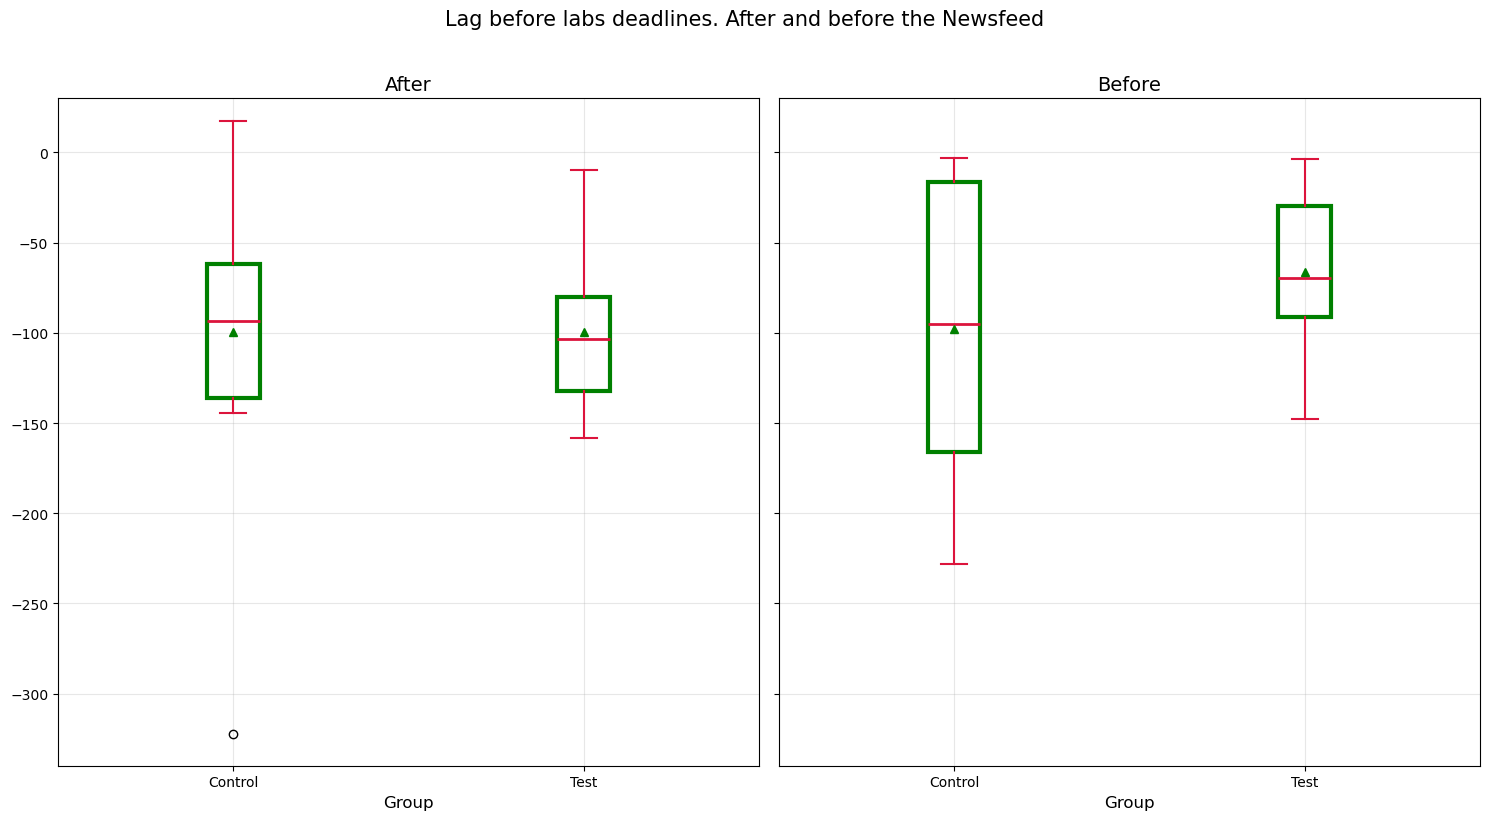

In [37]:
style = {
    'box': dict(linewidth=3, color="#008000", facecolor='none'),
    'median': dict(linewidth=2, color="#DC143C"),
    'whisker': dict(linewidth=1.5, color="#DC143C"),
    'cap': dict(linewidth=1.5, color="#DC143C"),
    'flier': dict(marker='o', markersize=6, markerfacecolor='none'),
    'mean': dict(marker='^', markeredgecolor='#008000', markerfacecolor='#008000', markersize=6)
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Lag before labs deadlines. After and before the Newsfeed', fontsize=15, y=1.02)

control_before = groups['control'][0]  # diff_before для control
test_before = groups['test'][0]        # diff_before для test
control_after = groups['control'][1]   # diff_after для control
test_after = groups['test'][1]         # diff_after для test

# График AFTER
ax1.boxplot(
    [control_after, test_after],
    tick_labels=['Control', 'Test'],
    patch_artist=True,
    boxprops=style['box'],
    medianprops=style['median'],
    whiskerprops=style['whisker'],
    capprops=style['cap'],
    flierprops=style['flier'],
    showmeans=True,
    meanprops=style['mean']
)

ax1.set_title('After', fontsize=14)
ax1.set_xlabel('Group', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-340, 30)

# График BEFORE
ax2.boxplot(
    [control_before, test_before],
    tick_labels=['Control', 'Test'],
    patch_artist=True,
    boxprops=style['box'],
    medianprops=style['median'],
    whiskerprops=style['whisker'],
    capprops=style['cap'],
    flierprops=style['flier'],
    showmeans=True,
    meanprops=style['mean']
)

ax2.set_title('Before', fontsize=14)
ax2.set_xlabel('Group', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(-340, 30)

ax2.set_yticklabels([])

plt.tight_layout()
plt.show()

## Каков был IQR контрольной группы до появления новостей?

In [38]:
control_before = groups['control'][0]
q1 = control_before.quantile(0.25)
q3 = control_before.quantile(0.75)
iqr = q3 - q1
print(f"Ответ: IQR контрольной группы до появления новостей — {iqr}")


Ответ: IQR контрольной группы до появления новостей — 150.0
